In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape
# there are 785 pixles/cols instead of 784 because it is including the label column as well 

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11969,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#checking if the label will show the exact digit if we try to plot it
import matplotlib.pyplot as plt

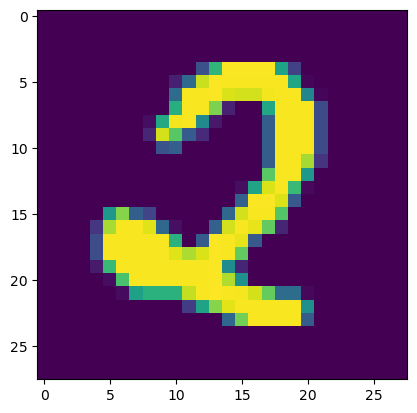

In [6]:
plt.imshow(df.iloc[32119,1:].values.reshape(28,28))

# Now we will use ML algorithm on it to see how much accuracy we can reach 

In [45]:
#Extracting X and Y first
X = df.iloc[:,1:] #All rows with columns from 1 onwards
y = df.iloc[:,0] #All rows with 0 column only

In [46]:
#Now doing the train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [47]:
#There are 33600 images in train set out of 42000
X_train.shape

(33600, 784)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
#fitting the train data on the knn algorithm
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
#this will take time as the data is relative large and we used time module to check how much time it wil take
#That is why we use PCA which decreases the no of columns and give almost the same amount of accuracy
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)
# it takes around 13 sec to predict

13.455999612808228


In [ ]:
#Checking the accuracy score with KNN algo with all 784 columns and accuracy is around 96%
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# Now we will try to understand with PCA how much accuracy we can get with reduced columns

In [57]:
#using the standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
#mean centric the whole data
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [59]:
#using the pca here
from sklearn.decomposition import PCA
# im keeping again components to None so that i can check how many components i should keep to reach 90%. check below
pca = PCA(n_components = 100) 
# here None means all 728 components if we keep 100 then there will be only 100

In [60]:
# we finded eigen values and vectors in this step and then shifiting it to new coordinate axis.
# It is now in transform coordinate system where we can apply any algorithm to it now.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [61]:
#Thus here shape would be 33600, 784 as we kept components to None. If we change it to (100) i.e 784 will change to 100
X_train_trf.shape

(33600, 100)

In [62]:
knn = KNeighborsClassifier()

In [63]:
#applying knn on x_train_trf(transform)
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [64]:
y_pred = knn.predict(X_test_trf)

In [65]:
#Thus we get more than 90% accuracy even when we only used 100 columns only that is due to PCA
accuracy_score(y_test,y_pred)

0.93

In [66]:
# this will show the accuracy score for each component once we achieve 90% with any principe component we will only take till those components
for i in range(1,785):
    pca = PCA(n_components=1)
    X_train_trf = scaler.fit_transform(X_train)
    X_test_trf = scaler.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))    

0.93
0.93
0.93
0.93
0.93


KeyboardInterrupt: 

In [67]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [68]:
#There are only columns 2x2. that is because every datapoint is in a 2d plot
X_train_trf

array([[-226.6067819 ,  305.87901054],
       [  38.33689744, -461.0809609 ],
       [-305.49138723, -351.66759452],
       ...,
       [ -28.00075493,  596.06857478],
       [ 233.96857968,   18.62944436],
       [1096.50413868, -254.72550984]])

In [69]:
#plotting 2D scatterplot using plotly as it shows value also while interacting of x and y
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0], y = X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [70]:
#now transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [71]:
# here we have 3x3 so every datapoint will be in a 3D
X_train_trf

array([[-226.60565106,  305.89482954,  417.17073534],
       [  38.33619907, -461.08510469,  100.39025506],
       [-305.49158452, -351.66849484, -961.36009672],
       ...,
       [ -28.00135021,  596.07119219,  606.24457138],
       [ 233.97028144,   18.64755081, -148.26797244],
       [1096.50495748, -254.72393261, -560.33207078]])

In [74]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r = 20, t = 20, b = 20))

fig.show()

In [75]:
#eigen values
pca.explained_variance_

array([332443.4478627 , 250909.69768137, 207204.29998661])

In [76]:
# 3 vectors in the 784 dimensional space
#pca.components_
# or
# eigen vectors
pca.components_.shape
# means in each vector there are 784 components i.e if we have 3 vectors each will have 784 components

(3, 100)

# Finding the optimal principle components on this data i.e how many components we should take in total to get an accuracy of 90% or above once it is achieved that many components will be taken in total

In [77]:
# this three below in o/p explains the variance of the first 3 components i.e around 11% or 12% 
pca.explained_variance_ratio_

array([0.1058875 , 0.07991796, 0.06599723])

In [78]:
# performing pca again and not putting restrictions to the no of components
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [79]:
# there will be 784 as all principle components are present here
pca.explained_variance_.shape
# it should be 784 kindly recheck this here from the above in X_train_trf
# now it showed 784 as i changed no of components above to 784

(100,)

In [80]:
pca.components_.shape
# it is 100 only out of 784 as i have taken only 100 components earlier. recheck above

(100, 100)

In [81]:
np.cumsum(pca.explained_variance_ratio_)
# right now it is only showing data of 100 components and how variance or accuracy is increasing with each component

array([0.1058875 , 0.18580546, 0.25180269, 0.31035755, 0.36400332,
       0.40959049, 0.44551873, 0.47739252, 0.50730272, 0.53413602,
       0.55737786, 0.58025668, 0.59920425, 0.61759058, 0.63493524,
       0.6509388 , 0.66528614, 0.67928689, 0.69245134, 0.70505803,
       0.71674404, 0.72749226, 0.73793786, 0.7478521 , 0.75761429,
       0.76699611, 0.77572361, 0.78432205, 0.79235149, 0.79968216,
       0.80683742, 0.81391464, 0.82042093, 0.82681119, 0.83301646,
       0.83891038, 0.84456884, 0.85000966, 0.85529043, 0.86051718,
       0.86545147, 0.87027854, 0.87495086, 0.87928888, 0.88358807,
       0.88773701, 0.8916784 , 0.89550438, 0.8992017 , 0.90283337,
       0.90634832, 0.9097792 , 0.91299743, 0.91617709, 0.91927884,
       0.92223907, 0.92513911, 0.92793932, 0.93069056, 0.93340066,
       0.93604071, 0.93860867, 0.94111569, 0.94349634, 0.94582433,
       0.94806656, 0.95027812, 0.95242914, 0.95453351, 0.95658388,
       0.95860936, 0.9606032 , 0.96252599, 0.96437476, 0.96620

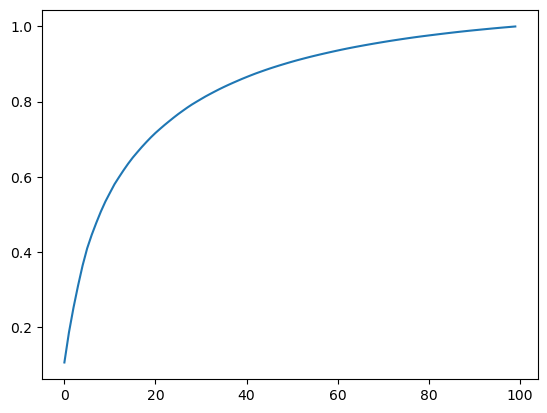

In [82]:
# through this plot we will easily get to know how many components we should take to reach accuracy of 90%
plt.plot(np.cumsum(pca.explained_variance_ratio_))